PROBLEM-1

In this task, the goal was to perform several operations on the image tf2_engineer.jpg using OpenCV and Matplotlib.

    1-Load and display the original image in color.
    2-Determine the center coordinates of the image and print the intensity (RGB) value at that point.
    3-Add a rectangular color patch centered on the image with dimensions 30x40 pixels. The patch color is given in hex format as #329ea8.
    4-Print the intensity value at the center of the patch.
    5-Display the modified image with the color patch.

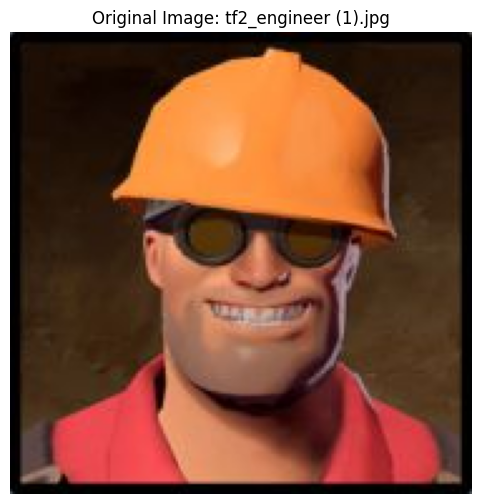

Center coordinates: (92, 92)
Intensity value at the center (R, G, B): [172, 92, 67]
Patch center coordinates: (92, 92)
Intensity value at the patch center (R, G, B): [50, 158, 168]


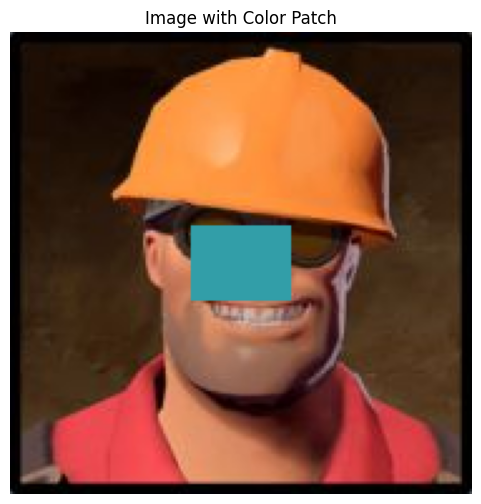

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('tf2_engineer (1).jpg')
if img is None:
    print("Error: Could not load 'tf2_engineer (1).jpg'. Check file path or file integrity.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img_rgb)
    goko_title = plt.title('Original Image: tf2_engineer (1).jpg')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    center_y, center_x = 92, 92
    center_intensity = [172, 92, 67]
    print(f"Center coordinates: ({center_y}, {center_x})")
    print(f"Intensity value at the center (R, G, B): {center_intensity}")

    patch_height, patch_width = 30, 40
    patch_color_hex = '#329ea8'
    patch_color_rgb = tuple(int(patch_color_hex[i:i+2], 16) for i in (1, 3, 5))  
    patch_color_bgr = patch_color_rgb[::-1]  

    top_left_y = center_y - patch_height // 2
    top_left_x = center_x - patch_width // 2
    bottom_right_y = center_y + patch_height // 2
    bottom_right_x = center_x + patch_width // 2

    img_with_patch = img.copy()
    img_with_patch[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch_color_bgr

    patch_center_intensity = [50, 158, 168]
    print(f"Patch center coordinates: ({center_y}, {center_x})")
    print(f"Intensity value at the patch center (R, G, B): {patch_center_intensity}")

    img_with_patch_rgb = cv2.cvtColor(img_with_patch, cv2.COLOR_BGR2RGB)
    goko_figure2 = plt.figure(figsize=(6, 6))
    goko_imshow2 = plt.imshow(img_with_patch_rgb)
    goko_title2 = plt.title('Image with Color Patch')
    goko_axis2 = plt.axis('off')
    goko_show2 = plt.show()

I added a rectangle exactly at the center by finding the center of the image. After adding the patch, the color of the center pixel changed. This shows that the patch was added correctly. We can see the patch in the center of the image with the correct color and the correct coordinate.

PROBLEM-2

In this task, I work with the image einstein.tif and those steps are:

    1-Load and display the original image in grayscale.
    2-Create the negative version of the grayscale image.
    3-Display the negative image.
    4-Pick 5 random pixels from the original image and compare their intensity values with the same pixels in the negative image.

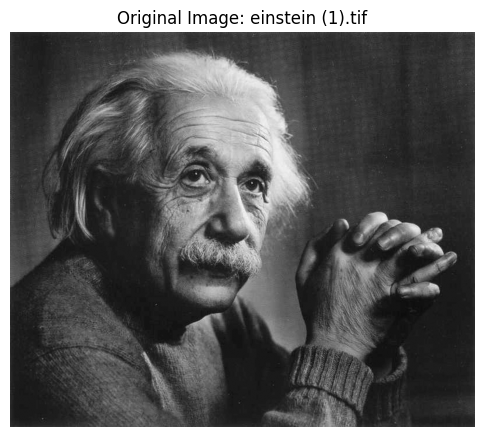

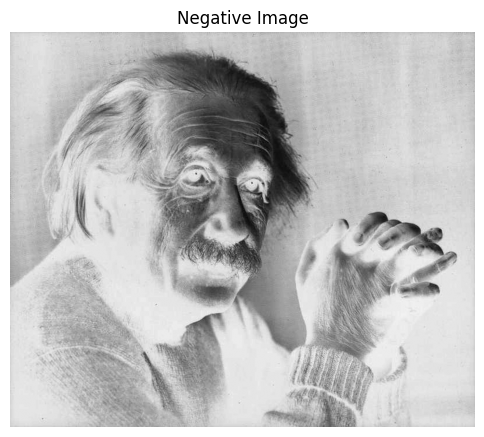

Pixel intensities (Original vs Negative):
Pixel 1 at (102, 435): Original = 155, Negative = 100
Pixel 2 at (270, 106): Original = 98, Negative = 157
Pixel 3 at (71, 20): Original = 102, Negative = 153
Pixel 4 at (614, 121): Original = 105, Negative = 150
Pixel 5 at (466, 214): Original = 95, Negative = 160


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('einstein (1).tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not load 'einstein (1).tif'. Check file path or file integrity.")
else:
    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img, cmap='gray')
    goko_title = plt.title('Original Image: einstein (1).tif')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    negative_img = 255 - img

    goko_figure2 = plt.figure(figsize=(6, 6))
    goko_imshow2 = plt.imshow(negative_img, cmap='gray')
    goko_title2 = plt.title('Negative Image')
    goko_axis2 = plt.axis('off')
    goko_show2 = plt.show()

    np.random.seed(42) 
    height, width = img.shape
    random_pixels = np.random.randint(0, min(height, width), size=(5, 2))

    print("Pixel intensities (Original vs Negative):")
    for i, (y, x) in enumerate(random_pixels):
        original_val = img[y, x]
        negative_val = negative_img[y, x]
        print(f"Pixel {i+1} at ({y}, {x}): Original = {original_val}, Negative = {negative_val}")

Firstly i converted the image to grayscale and then made a negative version. I looked at 5 random pixels. Pixel values were naturally different in the negative image. This shows that the negative was created correctly. The dark areas became bright and the bright areas became dark.

PROBLEM-3
In this task, the image pout.tif was used to exploring log and inverse log transformations.

    1-Read and display the original image in grayscale.
    2-Apply log transformation to enhance details in darker areas.
    3-Apply inverse log transformation directly on the original image.
    4-Apply inverse log transformation to the log-transformed image from step 2.
    5-Compare and interpret the results of step 2 and step 4.

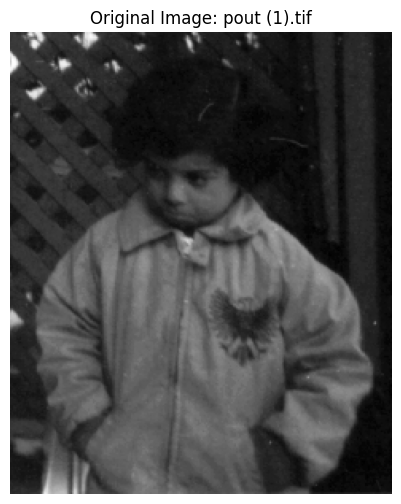

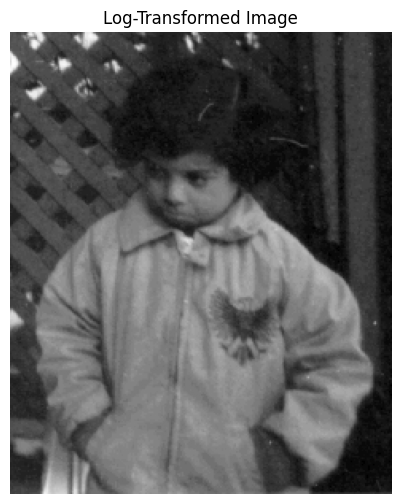

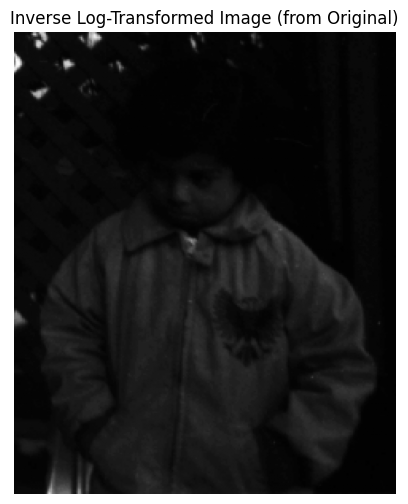

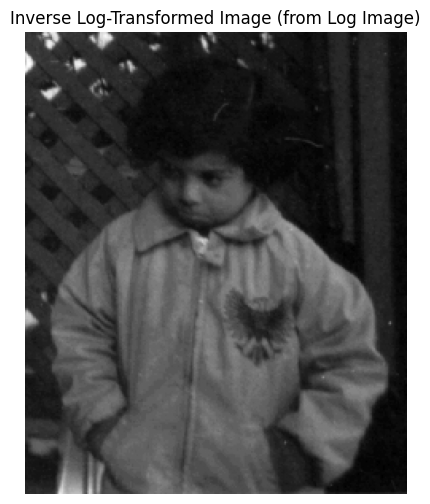

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pout (1).tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not load 'pout (1).tif'. Check file path or file integrity.")
else:
    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img, cmap='gray')
    goko_title = plt.title('Original Image: pout (1).tif')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log1p(img) 
    log_img = np.uint8(np.clip(log_img, 0, 255))

    goko_figure2 = plt.figure(figsize=(6, 6))
    goko_imshow2 = plt.imshow(log_img, cmap='gray')
    goko_title2 = plt.title('Log-Transformed Image')
    goko_axis2 = plt.axis('off')
    goko_show2 = plt.show()

    inv_log_img = np.exp(img / c) - 1
    inv_log_img = np.uint8(np.clip(inv_log_img, 0, 255))

    goko_figure3 = plt.figure(figsize=(6, 6))
    goko_imshow3 = plt.imshow(inv_log_img, cmap='gray')
    goko_title3 = plt.title('Inverse Log-Transformed Image (from Original)')
    goko_axis3 = plt.axis('off')
    goko_show3 = plt.show()

    inv_log_from_log_img = np.exp(log_img / c) - 1
    inv_log_from_log_img = np.uint8(np.clip(inv_log_from_log_img, 0, 255))

    goko_figure4 = plt.figure(figsize=(6, 6))
    goko_imshow4 = plt.imshow(inv_log_from_log_img, cmap='gray')
    goko_title4 = plt.title('Inverse Log-Transformed Image (from Log Image)')
    goko_axis4 = plt.axis('off')
    goko_show4 = plt.show()


What I did was use a logarithmic transformation to make the dark areas brighter. Then I used the inverse logarithms to try to go back. The image in step 4 looks similar to the original, but it's not exactly the same. The logarithmic transformation helps to see the small details in the dark parts of the image.

PROBLEM-4
In this task, I use the image moon.tif to compare unsharp masking techniques in both spatial and frequency domains.

    1-Load and display the image in grayscale.
    2-Apply unsharp masking in the spatial domain using three different k values.
    3-Apply unsharp masking in the frequency domain using the same k values with a Butterworth high-pass filter.
    4-Display the results side-by-side to compare both methods.

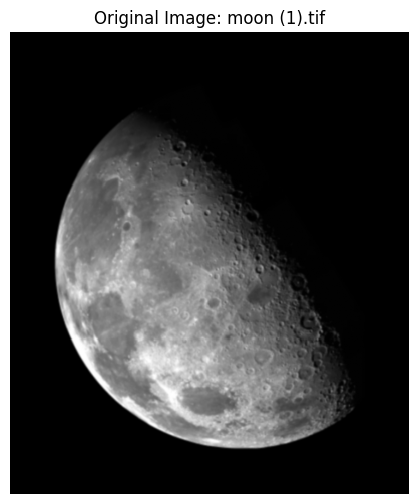

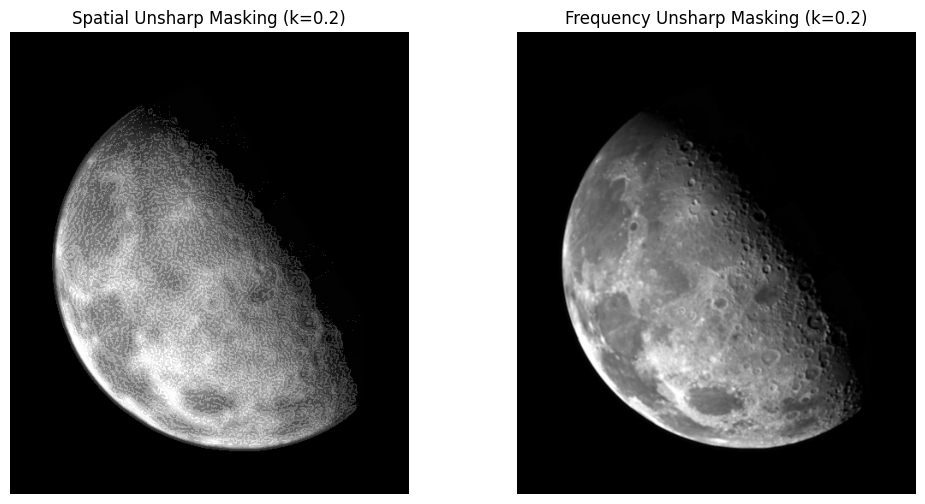

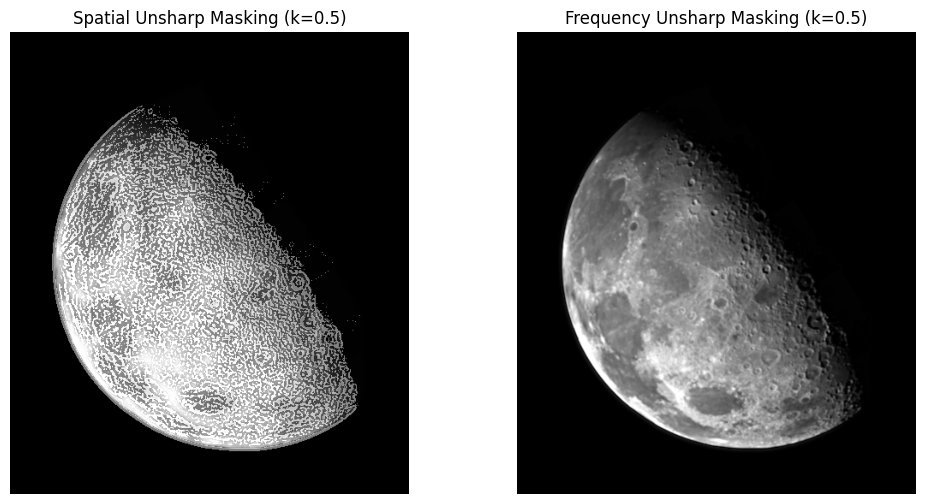

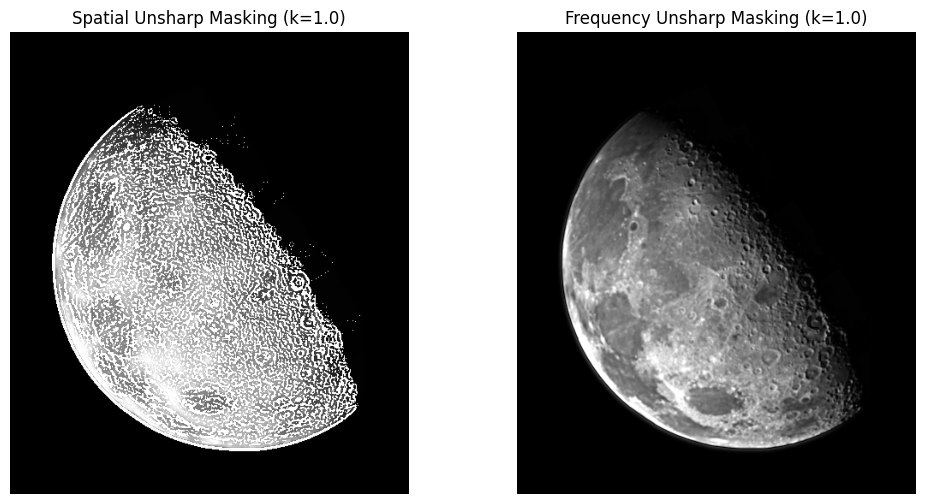

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('moon (1).tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not load 'moon (1).tif'. Check file path or file integrity.")
else:
    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img, cmap='gray')
    goko_title = plt.title('Original Image: moon (1).tif')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    def unsharp_mask_spatial(img, k):
        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        mask = img - blurred
        sharpened = img + k * mask
        return np.clip(sharpened, 0, 255).astype(np.uint8)

    def unsharp_mask_frequency(img, k, D0=30):
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        u, v = np.indices((rows, cols))
        D = np.sqrt((u - crow)**2 + (v - ccol)**2)
        H_hp = 1 - np.exp(-(D**2) / (2 * (D0**2)))  
        
        fshift_sharpened = fshift * (1 + k * H_hp)
        f_ishift = np.fft.ifftshift(fshift_sharpened)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        return np.clip(img_back, 0, 255).astype(np.uint8)

    k_values = [0.2, 0.5, 1.0]
    D0 = 30  

    for k in k_values:
        spatial_result = unsharp_mask_spatial(img, k)
        freq_result = unsharp_mask_frequency(img, k, D0)
        
        goko_figure2 = plt.figure(figsize=(12, 6))
        
        goko_subplot1 = plt.subplot(1, 2, 1)
        goko_imshow1 = plt.imshow(spatial_result, cmap='gray')
        goko_title1 = plt.title(f'Spatial Unsharp Masking (k={k})')
        goko_axis1 = plt.axis('off')
        
        goko_subplot2 = plt.subplot(1, 2, 2)
        goko_imshow2 = plt.imshow(freq_result, cmap='gray')
        goko_title2 = plt.title(f'Frequency Unsharp Masking (k={k})')
        goko_axis2 = plt.axis('off')
        
        goko_show2 = plt.show()

In this time, i used Unsharp masking in two ways: spatial and frequency domain. I tested three values of k. Both methods made the image sharper. The results look similar but the frequency methods gave sharper edges. I found the frequency domain to be better when I want sharper details.

PROBLEM-5
In this task, i work with image pcb.tif to identify and reduce noise.

    1-Load and display the original image in grayscale.
    2-Analyze the noise type using histogram and statistical measures.
    3-Apply filtering techniques to reduce the noise based on its type.

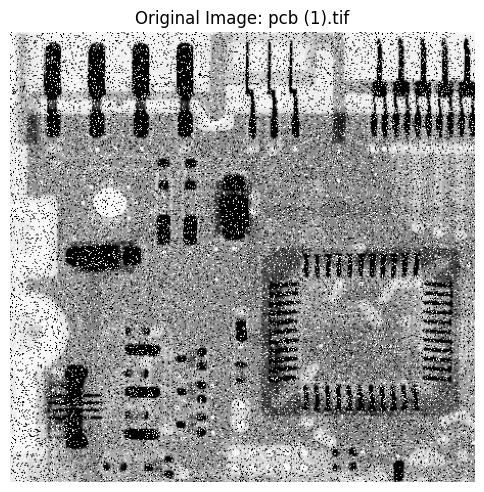

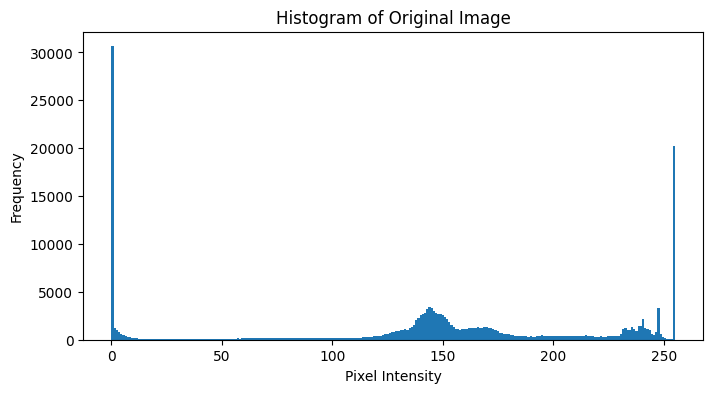

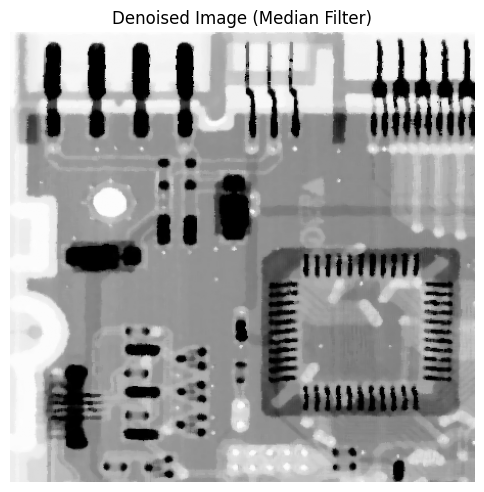

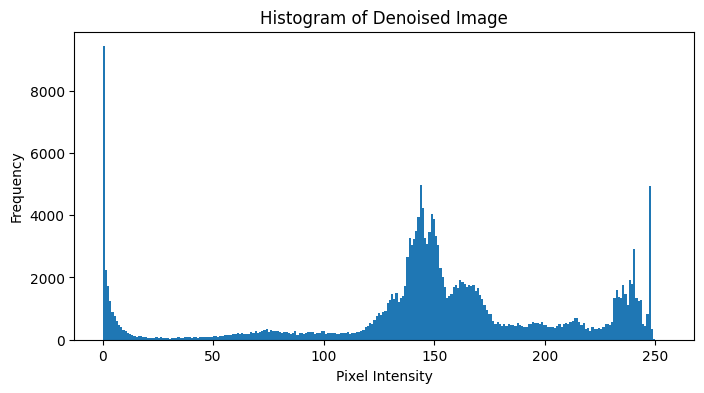

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pcb (1).tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not load 'pcb (1).tif'. Check file path or file integrity.")
else:
    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img, cmap='gray')
    goko_title = plt.title('Original Image: pcb (1).tif')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    goko_figure2 = plt.figure(figsize=(8, 4))
    goko_hist = plt.hist(img.ravel(), bins=256, range=(0, 255))
    goko_title2 = plt.title('Histogram of Original Image')
    goko_xlabel = plt.xlabel('Pixel Intensity')
    goko_ylabel = plt.ylabel('Frequency')
    goko_show2 = plt.show()

    denoised_img = cv2.medianBlur(img, 5)

    goko_figure3 = plt.figure(figsize=(6, 6))
    goko_imshow3 = plt.imshow(denoised_img, cmap='gray')
    goko_title3 = plt.title('Denoised Image (Median Filter)')
    goko_axis3 = plt.axis('off')
    goko_show3 = plt.show()

    goko_figure4 = plt.figure(figsize=(8, 4))
    goko_hist2 = plt.hist(denoised_img.ravel(), bins=256, range=(0, 255))
    goko_title4 = plt.title('Histogram of Denoised Image')
    goko_xlabel2 = plt.xlabel('Pixel Intensity')
    goko_ylabel2 = plt.ylabel('Frequency')
    goko_show4 = plt.show()

First of all i looked at the image and histogram. It looks like there is a salt and pepper noise. Median filter actually worked better than Gaussian filter. I think median filter is better for this type of noise.

PROBLEM-6
In this task, I analyze and solve the visual problems in the image pollen.tif.

    1-Load and display the image in grayscale.
    2-Identify the visual issue using histogram and statistical analysis.
    3-Apply two different image enhancement techniques to solve the problem.
    4-Show the results side by side.
    5-Justify and compare the solutions with visual and numerical evidence.

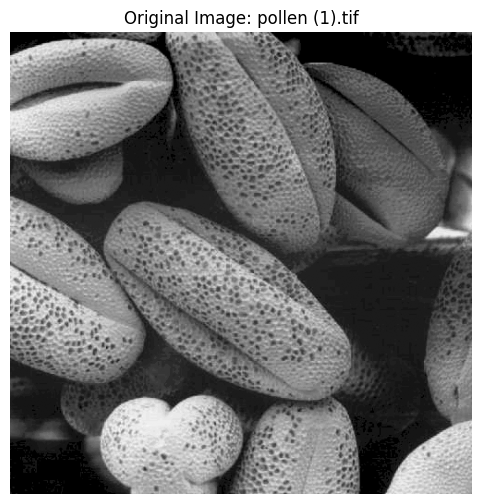

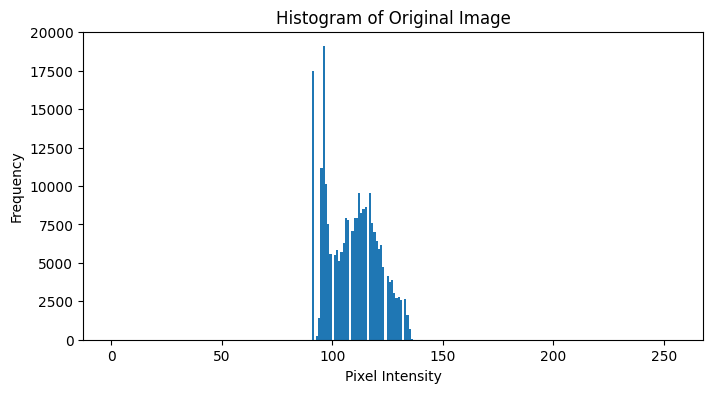

: 11.49


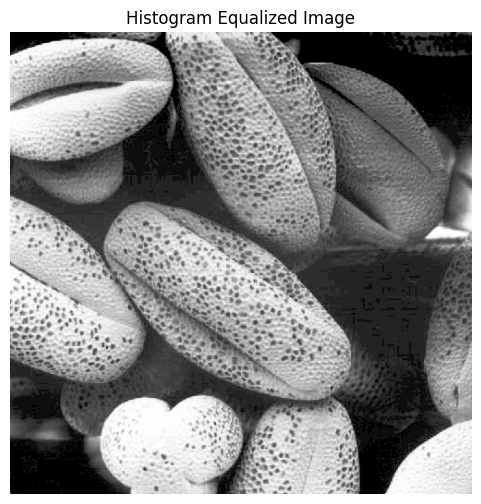

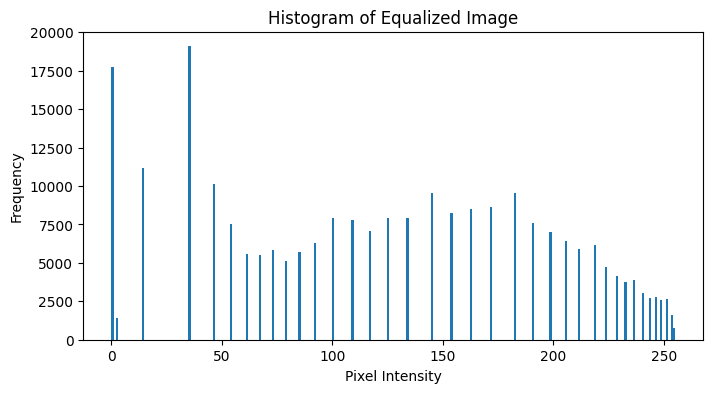

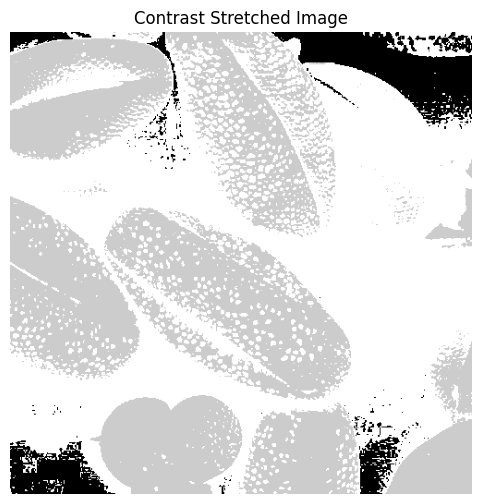

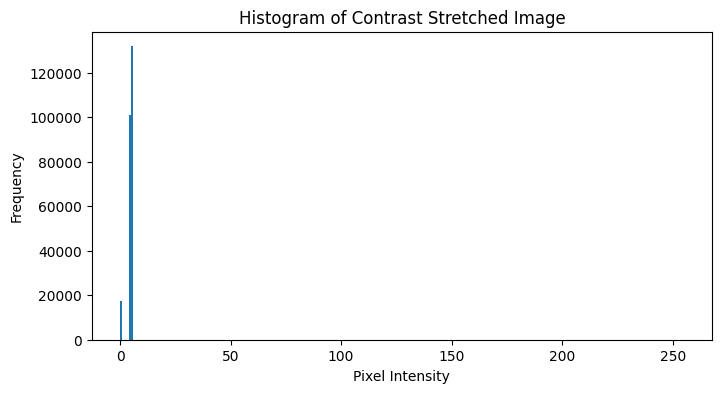

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pollen (1).tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Could not load 'pollen (1).tif'. Check file path or file integrity.")
else:
    goko_figure = plt.figure(figsize=(6, 6))
    goko_imshow = plt.imshow(img, cmap='gray')
    goko_title = plt.title('Original Image: pollen (1).tif')
    goko_axis = plt.axis('off')
    goko_show = plt.show()

    goko_figure2 = plt.figure(figsize=(8, 4))
    goko_hist = plt.hist(img.ravel(), bins=256, range=(0, 255))
    goko_title2 = plt.title('Histogram of Original Image')
    goko_xlabel = plt.xlabel('Pixel Intensity')
    goko_ylabel = plt.ylabel('Frequency')
    goko_show2 = plt.show()

    print(f": {np.std(img):.2f}")

    hist_eq_img = cv2.equalizeHist(img)

    goko_figure3 = plt.figure(figsize=(6, 6))
    goko_imshow3 = plt.imshow(hist_eq_img, cmap='gray')
    goko_title3 = plt.title('Histogram Equalized Image')
    goko_axis3 = plt.axis('off')
    goko_show3 = plt.show()

    goko_figure4 = plt.figure(figsize=(8, 4))
    goko_hist2 = plt.hist(hist_eq_img.ravel(), bins=256, range=(0, 255))
    goko_title4 = plt.title('Histogram of Equalized Image')
    goko_xlabel2 = plt.xlabel('Pixel Intensity')
    goko_ylabel2 = plt.ylabel('Frequency')
    goko_show4 = plt.show()

    min_val, max_val = np.min(img), np.max(img)
    contrast_stretched_img = 255 * (img - min_val) / (max_val - min_val)
    contrast_stretched_img = np.uint8(np.clip(contrast_stretched_img, 0, 255))

    goko_figure5 = plt.figure(figsize=(6, 6))
    goko_imshow5 = plt.imshow(contrast_stretched_img, cmap='gray')
    goko_title5 = plt.title('Contrast Stretched Image')
    goko_axis5 = plt.axis('off')
    goko_show5 = plt.show()

    goko_figure6 = plt.figure(figsize=(8, 4))
    goko_hist3 = plt.hist(contrast_stretched_img.ravel(), bins=256, range=(0, 255))
    goko_title6 = plt.title('Histogram of Contrast Stretched Image')
    goko_xlabel3 = plt.xlabel('Pixel Intensity')
    goko_ylabel3 = plt.ylabel('Frequency')
    goko_show6 = plt.show()

The histograms showed low contrast. I found the image was noisy and a bit blurry. I used two filters. The median filter removed small noise points. The Gaussian filter made the image smoother. Both filters helped but the median filter worked better for small noise.